In [53]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
from scipy import stats

In [48]:
migVSmoney=pd.read_csv("Raw_data/MigrationVSMoney33_continents.csv")
migVSmoney=migVSmoney.sort_values(by="Average Sum of Money")
migVSmoney.head()

KeyError: 'Average Sum of Money'

In [59]:
migVSmoney.tail()

,Recipient,Average Sum of Money,Average of emigration over all OECD countries
33,Dominica,451.493241,0.003974
27,Cook Islands,825.735240,0.000139
68,Marshall Islands,1317.719998,0.000597
114,Tuvalu,1641.351940,0.000300
78,Nauru,1859.196172,0.000247


In [60]:
migVSmoneyQ=migVSmoney.quantile([.05, .95])
migVSmoneyQ

,Average Sum of Money,Average of emigration over all OECD countries
0.05,22.663269,0.000007
0.95,376.136930,0.004411


In [69]:
migVSmoneyQ = migVSmoney[(migVSmoney["Average Sum of Money"] > 22.663269) & (migVSmoney["Average Sum of Money"] < 376.136930) ]
df = migVSmoneyQ[(migVSmoneyQ["Average of emigration over all OECD countries"] > 0.000007) & (migVSmoneyQ["Average of emigration over all OECD countries"] < 0.004411)]
len(df)


95

In [70]:
# define the data/predictors as the pre-set feature names  
#df = pd.DataFrame(df, columns=["Average Sum of Money"])

# Put the target (housing value -- MEDV) in another DataFrame
#target = pd.DataFrame(df, columns=["Average of emigration over all OECD countries"])

In [71]:
#Shapiro-Wilk
x = df['Average Sum of Money']
y = df["Average of emigration over all OECD countries"]

shapiro_results = scipy.stats.shapiro(x)

print(shapiro_results)
shapiro_results = scipy.stats.shapiro(y)

print(shapiro_results)

(0.8233736753463745, 2.7111020095560434e-09)
(0.5662453174591064, 2.6173184662468688e-15)


In [72]:
x = df['Average Sum of Money']
y = df["Average of emigration over all OECD countries"]

levene_results = scipy.stats.levene(x,y)

print(levene_results)


LeveneResult(statistic=74.105287887646725, pvalue=2.931515592835112e-15)


In [73]:
import statsmodels.api as sm

X = df["Average Sum of Money"]
y = df["Average of emigration over all OECD countries"]

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     Average of emigration over all OECD countries   R-squared:                       0.016
Model:                                                       OLS   Adj. R-squared:                  0.006
Method:                                            Least Squares   F-statistic:                     1.541
Date:                                           Wed, 08 Nov 2017   Prob (F-statistic):              0.218
Time:                                                   13:35:49   Log-Likelihood:                 541.97
No. Observations:                                             95   AIC:                            -1080.
Df Residuals:                                                 93   BIC:                            -1075.
Df Model:                                                      1                                         
Covariance Type:                                       nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0003      0.000      2.254      0.027    3.74e-05       0.001
Average Sum of Money  1.239e-06   9.98e-07      1.241      0.218   -7.43e-07    3.22e-06
==============================================================================
Omnibus:                       78.758   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.318
Skew:                           2.879   Prob(JB):                     5.36e-92
Kurtosis:                      11.546   Cond. No.                         233.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

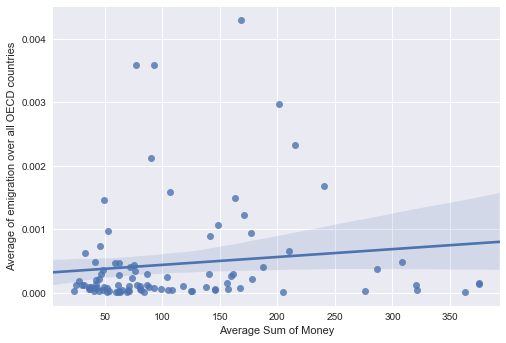

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="Average Sum of Money", y="Average of emigration over all OECD countries", data=df)
plt.show()